# Cubic Interpolation
Using the forward kinematics data from before, I will be using cubic interpolation to produce a smooth curve of the vector coordinates that I had previously recorded. 
***Before doing this, I must have made an n-body simulation of planets and done some other piece of code to get started with modelling (in a short timeframe).

### Intention
To produce a function that maintains the certain essence of a "shape". To be applied to the "shape" of the spine later on, but for this it could something *simpler* like one period of a sine wave (or something that looks similar to that). Trying to adjust something into that would be the challenge of the coded side of this since the checking if this final function -- to be displayed using {some numpy function} -- is within a specified range seems pretty easy (although potentially computationally intensive if I code inefficiently).

## Sources & Orders of Business
https://www.youtube.com/watch?v=9R5UxtJQNNg
1. Understand what cubic interpolation is and do some maths around this. Try and learn it well and explain it (to myself obviously).

2. Work on static cubic interpolation between varied points and try to analyse the shapes that they produce (from how I have parametrised the curves). 
    - Maybe use databases (or something from the CompSci course) to try and store the functions that look like the desired shape that I want (sine curve, one period) and see what the patterns are for that

https://uk.pinterest.com/pin/1337074888365165/
- Unironically very similar to what I want to do so... have this as some inspiration for how I could visualise my final project

# Learning
Below is a screenshot of the initial rules that I have to learn for this to work effectively.
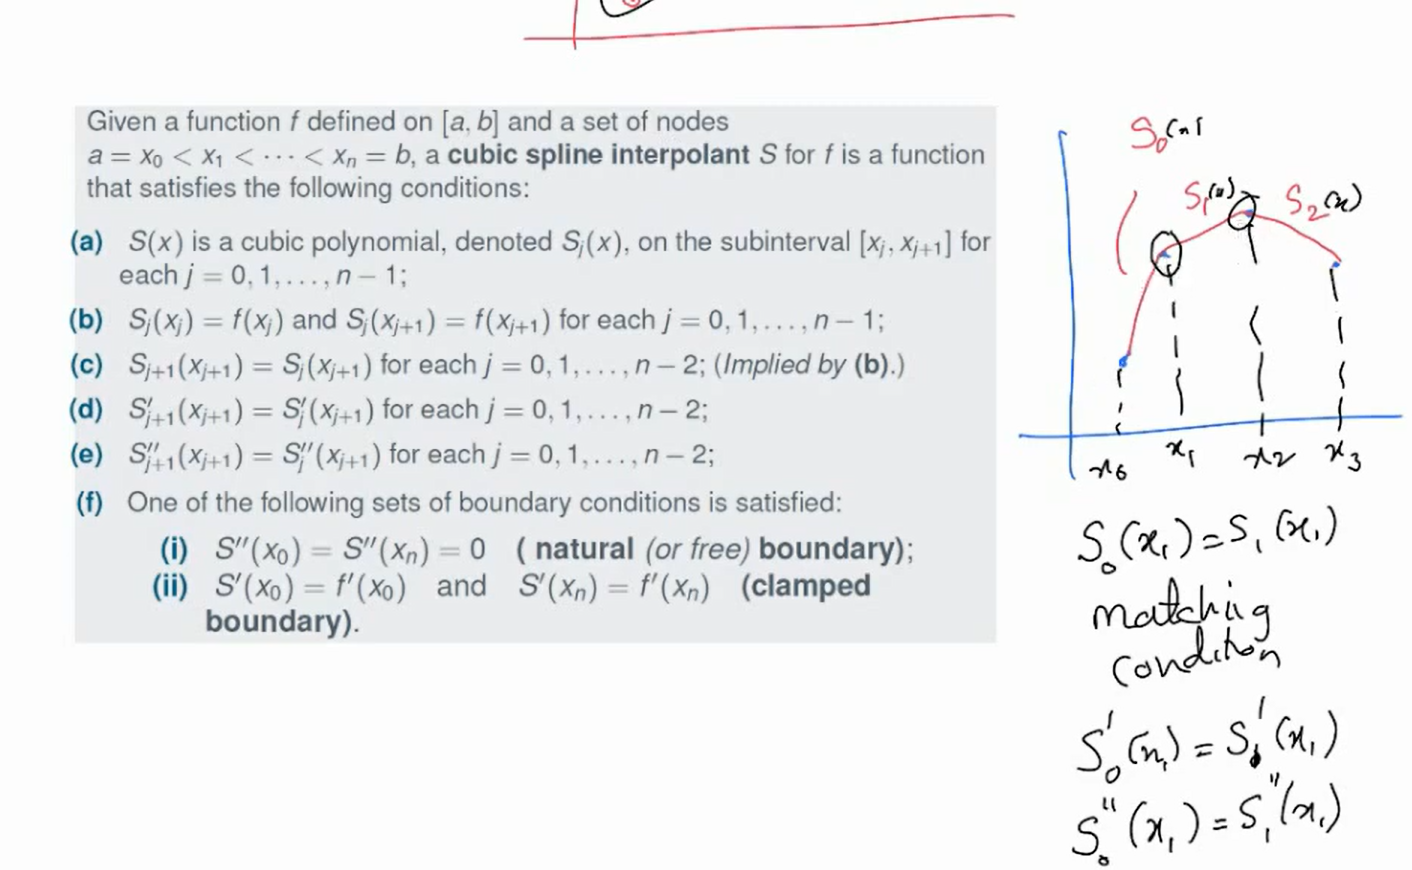

### Sources
For understanding of the context, the boundary conditions: 
https://www.youtube.com/watch?v=wMMjF7kXnWA

For workthrough examples:
https://www.youtube.com/watch?app=desktop&v=gT7F3TWihvk
https://math.libretexts.org/Workbench/Numerical_Methods_with_Applications_(Kaw)/5%3A_Interpolation/5.05%3A_Spline_Method_of_Interpolation

### Scaffolding Projects
1. Apply the findings of the initial tests into solving a quadratic spline of randomised integer coordinates (by hand)
2. Generalise this to run in Python (2D, quadratic spline)
3. Iterate in Python (2D, cubic spline)
4. Learn how this can be applied in 3D and then iterate from there